<a href="https://colab.research.google.com/github/ssaneei/ExplainableAI/blob/main/iNNvestigate_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
try:
  %tensorflow_version 2.x
  IS_COLAB = True
  if not os.path.exists("/content/innvestigate"):
    !git clone https://github.com/albermax/innvestigate.git
    !pip install /content/innvestigate --no-deps
except Exception:
  IS_COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


#Training a network

Imports

In [ ]:
import  warnings
warnings.simplefilter("ignore")


In [ ]:
%matplotlib inline
import imp
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

tf.compat.v1.disable_eager_execution()

import innvestigate

# Use utility libraries to focus on relevant iNNvestigate routines.
%cd /content/innvestigate/examples/utils
!pwd
import mnist as mnistutils

/content/innvestigate/examples/utils
/content/innvestigate/examples/utils


In [ ]:
innvestigate.__version__

'2.0.1'

Data Loading

In [ ]:
#load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#create preprocessing functions
input_range = [-1, 1]
preprocess, revert_preprocess = mnistutils.create_preprocessing_f(x_train, input_range)

#preprocess_data
data = (
    preprocess(x_train),
    y_train,
    preprocess(x_test),
    y_test,
)

num_classes = len(np.unique(data[1]))
label_to_class_name = [str(i) for i in range(num_classes)]

Create and train a CNN model

In [ ]:
#Create and train the model
input_shape = (28, 28, 1)

model = keras.models.Sequential(
    [
        keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
        keras.layers.Conv2D(64, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

scores = mnistutils.train_model(model, data, batch_size=120, epochs=10)
print("Scores on test set: loss=%s accuracy=%s" % tuple(scores))

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 190s 3ms/sample - loss: 0.1460 - accuracy: 0.9556
Epoch 2/10
60000/60000 [==============================] - 187s 3ms/sample - loss: 0.0372 - accuracy: 0.9882
Epoch 3/10
60000/60000 [==============================] - 181s 3ms/sample - loss: 0.0215 - accuracy: 0.9936
Epoch 4/10
60000/60000 [==============================] - 183s 3ms/sample - loss: 0.0137 - accuracy: 0.9958
Epoch 5/10
60000/60000 [==============================] - 180s 3ms/sample - loss: 0.0099 - accuracy: 0.9967
Epoch 6/10
60000/60000 [==============================] - 179s 3ms/sample - loss: 0.0082 - accuracy: 0.9973
Epoch 7/10
60000/60000 [==============================] - 180s 3ms/sample - loss: 0.0066 - accuracy: 0.9978
Epoch 8/10
60000/60000 [==============================] - 179s 3ms/sample - loss: 0.0056 - accuracy: 0.9982
Epoch 9/10
60000/60000 [==============================] - 182s 3ms/sample - loss: 0.0055 - accuracy: 0.9983
Epoch

# Analyzing a prediction


Analyze an image


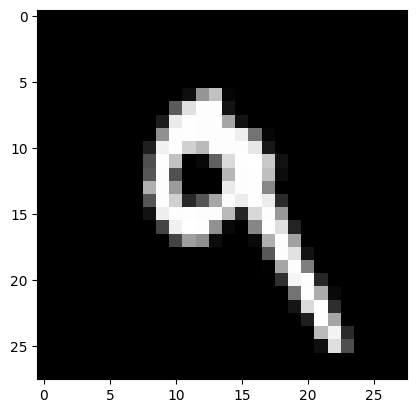

In [ ]:
#choose a test image
image = data[2][7:8]

plt.imshow(image.squeeze(), cmap="gray", interpolation="nearest")
plt.show()

How to create and use an analyzer

Here we use it from function category, "gradient" analyzer which shows how the linearized network function reacts on changes of a single feature.

How to do so?

Passing the model without the softmax layer to the analyze class. (to see the pure - change in- the scores before the probability essence change them!) 

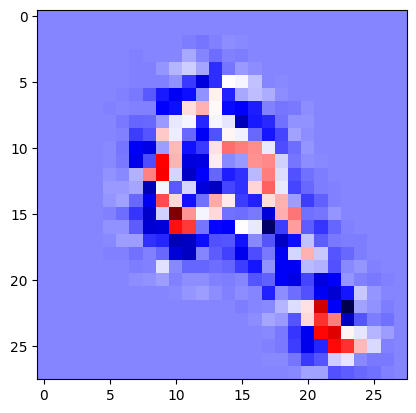

In [ ]:
# Strinpping the softmax activation from the model
model_wo_sm = innvestigate.model_wo_softmax(model)

# Creating an analyzer
gradient_analyzer = innvestigate.analyzer.Gradient(model_wo_sm)

# or using the function create_analyzer() 
# gradient_analyzer = innvestigate.create_analyzer("gradient", model_wo_sm)

# Applying the analyzer
analysis = gradient_analyzer.analyze(image)

# Displaying the gradient
plt.imshow(analysis.squeeze(), cmap="seismic", interpolation="nearest")
plt.show()

Also to emphasize the different components of the analysis, one can utilise 'absolute' or 'square' value of the gradient. This can be done by adding the 'postprocess' parameter to the analyzer

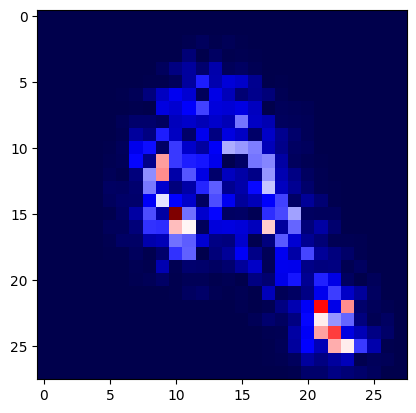

In [ ]:
# Creating an absolute analyzer
abs_gradient_analyzer = innvestigate.create_analyzer("gradient", model_wo_sm, postprocess = "abs")

# Applying the analyzer
abs_analysis = abs_gradient_analyzer.analyze(image)

# Displaying the gradient
plt.imshow(abs_analysis.squeeze(), cmap="seismic", interpolation="nearest")
plt.show()

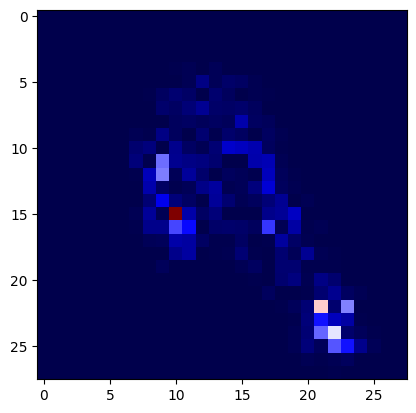

In [ ]:
# Creating an square analyzer
sqr_gradient_analyzer = innvestigate.create_analyzer("gradient", model_wo_sm, postprocess = "square")

# Applying the analyzer
sqr_analysis = sqr_gradient_analyzer.analyze(image)

# Displaying the gradient
plt.imshow(sqr_analysis.squeeze(), cmap="seismic", interpolation="nearest")
plt.show()

Similarly other analyzers can be parameterized.

Visualization by gray-scale

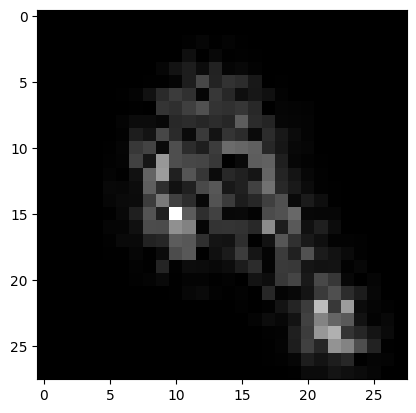

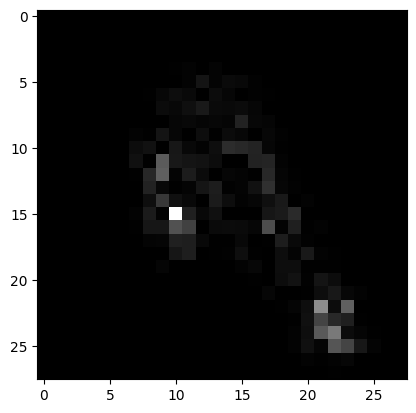

In [ ]:
plt.imshow(abs_analysis.squeeze(), cmap="gray", interpolation="nearest")
plt.show()
plt.imshow(sqr_analysis.squeeze(), cmap="gray", interpolation="nearest")
plt.show()

# Choosing the output neuron

In the previous examples, we analyze the output of the neuron with the highest activation. 

Here, we can choose which neuron to analyze:

In [ ]:
# Creating an analyzer and setting the neuron_selection_mode to "index"
inputXgradient_analyzer = innvestigate.create_analyzer(
    "input_t_gradient", model_wo_sm, neuron_selection_mode="index"
)

The **inputX gradient analyzer** is an example of **the attribution category** and we visualize it by means of a colored heatmap to highlight positive and negative attributions.

Analysis w.r.t neuron 0


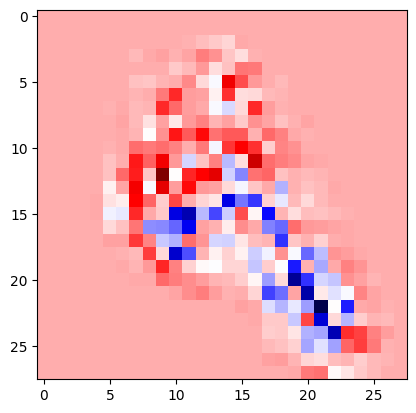

Analysis w.r.t neuron 1


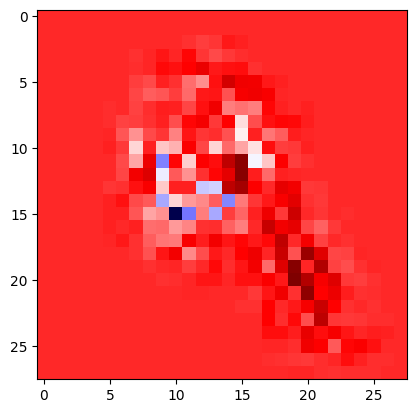

Analysis w.r.t neuron 2


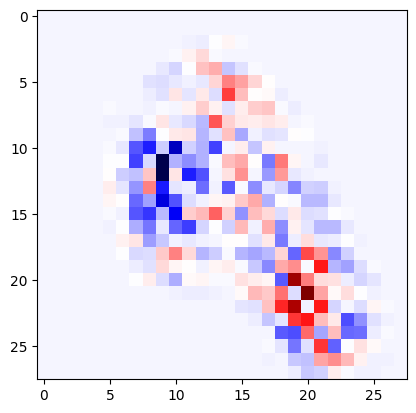

Analysis w.r.t neuron 3


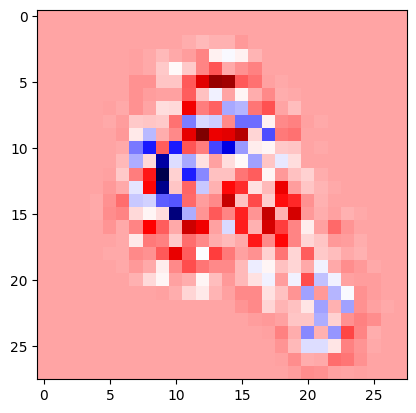

Analysis w.r.t neuron 4


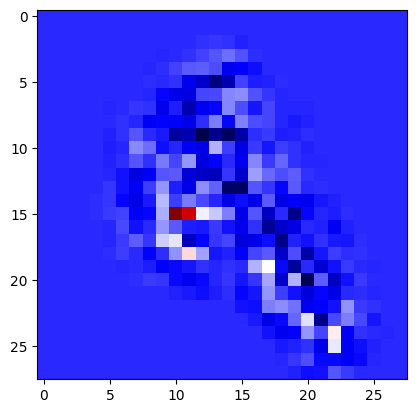

Analysis w.r.t neuron 5


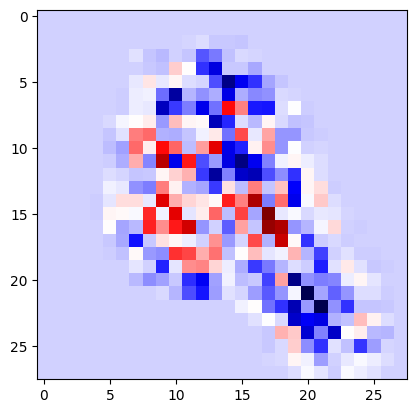

Analysis w.r.t neuron 6


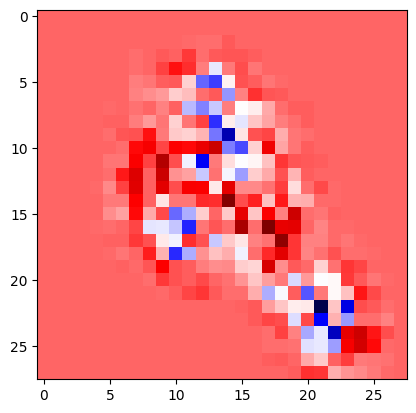

Analysis w.r.t neuron 7


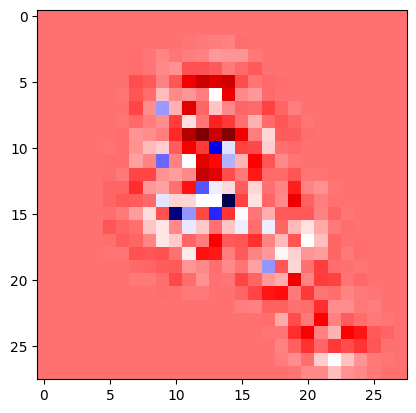

Analysis w.r.t neuron 8


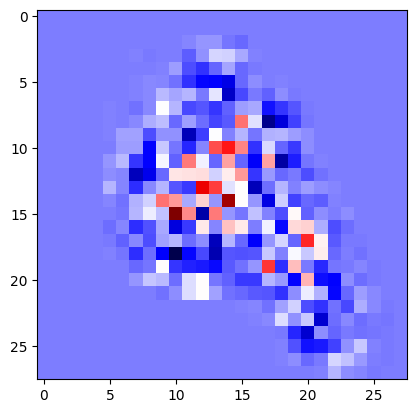

Analysis w.r.t neuron 9


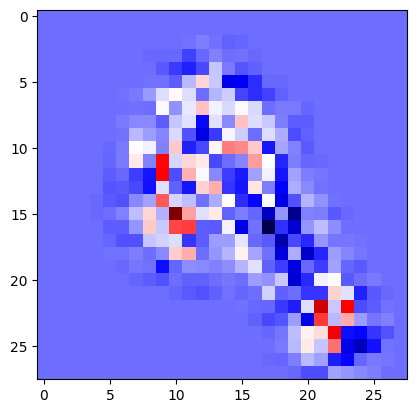

In [ ]:
for neuron_index in range(10):
  print("Analysis w.r.t neuron", neuron_index)

  # Applying the analyzer and pass that we want
  analysis = inputXgradient_analyzer.analyze(image, neuron_index)

  # Displaying the gradient
  plt.imshow(analysis.squeeze(), cmap="seismic", interpolation="nearest")
  plt.show()